# Data Modelling
The natural problems are modeled using mathematical tools, is important describe the data from problem using functions that allow predict the future behaviour for this dataset. For example we can use the lineal models (lineal regression) for data learning, is important  the model fitting (lineal regression,  polynomical and logistic regression) from training data. 

Nowadays there are so many strategies for training and testing data for example (Cross-validation, Leave one-out cross validation, K-Fold Stratified), in this case we can use 70% for training data (color blue) and 30% for testing data (color red), particular note that training and testing data is selected random way.

Populating the interactive namespace from numpy and matplotlib


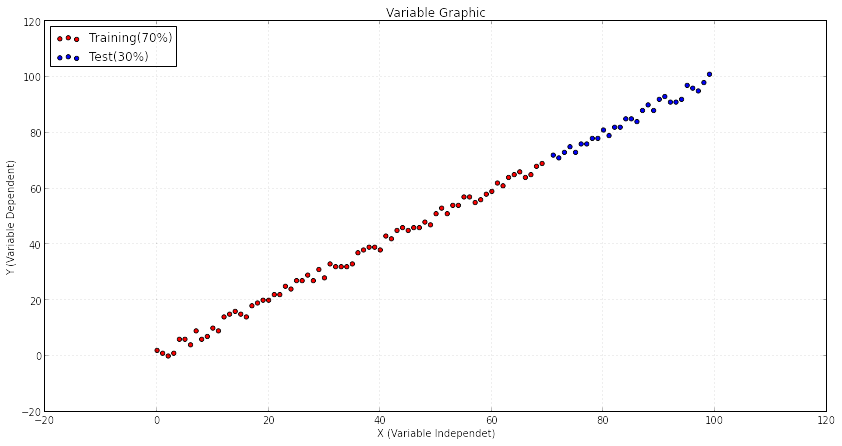

In [2]:
#plot in ipython
%pylab inline

import numpy as np#library fpara operaciones con algebra lineal
import matplotlib.pyplot as plt#libreria para graficar

import pylab as pl#librería para graficar
import random as rd#libreria para generar números aleatorios

def generateData(n):#funcion para generar un arreglo con valores aleatorios de n posiciones: O(n)
    return np.arange(n).reshape((n, 1))#arreglo con números de 0,1,....,n-1

def generateRandomYData(n,X):#funcion para generar un arreglo con valores aleatorios de n posiciones: O(n)
    dataY=np.array([X[i]+rd.randint(-2,2) for i in range(len(X))])#Generar valores en y para cada valor de x
    return np.squeeze(dataY)#convertir matriz a vector
    
n=100#cantidad de datos
size_train=0.7*n#tamaño de entrenamiento(70%)
inicio_test=size_train+1

X=generateData(n)#invoca la función para generar datos en el eje X
Y=generateRandomYData(n,X)#invoca la función para generar datos en Y

X_train=np.matrix(X[0:size_train,0]).reshape(size_train,1)#crea conjunto de entrenamiento para valores de eje X (70%)
Y_train=Y[0:size_train]#crea conjunto de entrenamiento de valores de eje Y para cada X (70%)
X_test=np.matrix(X[inicio_test:n,0]).reshape(n-inicio_test,1)#crea conjunto de testing para valores de eje X (30%)
Y_test=Y[inicio_test:n]#crea conjunto de testing de valores de eje Y para cada X (70%)




fig = plt.figure(figsize=(14, 7), dpi=100)#Dimension de la figura  
plt.scatter(np.array(X_train), Y_train, c="r", label="data")#grafica puntos de entrenamiento, color azul
plt.scatter(np.array(X_test), Y_test, c="b", label="data")#grafica puntos de testing, color azul

plt.legend(["Training(70%)","Test(30%)"],loc=2)#leyendas de la gráfica
plt.xlabel("X (Variable Independet)")#label eje x
plt.ylabel("Y (Variable Dependent)")#label eje y
plt.title("Variable Graphic")#título gráfica
plt.grid()#Dibuja la grilla
plt.show()#muestra gráfica

# Regression Analysis


The regression analysis is a powerfull statistical tool for estimating relationship among variables, for this tool is important to establish the independent and dependent variables. Regression analysis is widely used for prediction and forecasting, this regression is the base for understanding <a href="http://en.wikipedia.org/wiki/Machine_learning">machine learning</a>.

##Regression Models

The regression models involving the following variables:
<ul>
<li>The independent variables <b>$Y$</b>.</li>
<li>The dependent variables <b>$X$</b></li>
<li>The unknown variables (coeficients for regression) called  $\beta_i$,  $\forall$ $i$  $\in$ $\mathbb{Z}$.</li>
</ul>

A regression models relates to independent variables <b>$Y$</b> with dependent and unknown variables <b>$X$</b> 
 and </b>$\beta_i$</b>.

\begin{align}
    Y \approx f(X,\beta_i),  \forall  i  \in \mathbb{Z} 
\end{align}

###Simple Linear Regression

In simple linear regression it has n points, this points are composed by $x$ and $y$ coordinates where we can find $y_i$ in terms by linear combination between independent variables $x$ and unknown variables $\beta_i$, is possible represents mathematical this prediction model using a straight line in $\mathbb{R}^2$ given the next function

\begin{align}
    \hat{y_i} \approx \beta_1 x_i + \beta_0,\ \ \ \ \forall  i: 0\leq i \leq n
\end{align}

or fitted taking into account the general error $\epsilon$

\begin{align}
    y_i = \beta_1 x_i + \beta_0 + \epsilon,\ \ \ \ \forall  i: 0\leq i \leq n
\end{align}

Now is importat review the demostration for least square fitting 

\begin{align}
    \epsilon = \sum_{i=1}^{n} [\hat{y_i}-(\beta_1 x_i + \beta_0)]^2 
\end{align}

Now is important minimize the error, for this reason is important derivate error function and match to zero.

\begin{align}
    \frac{\partial \epsilon}{\partial \beta_0}=0 \ \ \ \ , \ \ \ \ \frac{\partial \epsilon}{\partial \beta_1}=0 
\end{align}
\begin{align}
    \frac{\partial \epsilon}{\partial \beta_0}=-2\sum_{i=1}^{n}[\hat{y_i}-(\beta_1 x_i + \beta_0)]=0
\end{align}
\begin{align}
    \frac{\partial \epsilon}{\partial \beta_1}=-2\sum_{i=1}^{n}[\hat{y_i}-(\beta_1 x_i + \beta_0)]x_i=0
\end{align}

Well now match partial derivates equal to zero


\begin{align}
    -2\sum_{i=1}^{n}[\hat{y_i}-(\beta_1 x_i + \beta_0)] =0
\end{align}

\begin{align}
    -2\sum_{i=1}^{n}[\hat{y_i}-(\beta_1 x_i + \beta_0)]x_i=0
\end{align}

Using linearity property for first partial derivate


\begin{align}
    \sum_{i=1}^{n}[\hat{y_i}-(\beta_1 x_i + \beta_0)] =0
\\
    \sum_{i=1}^{n}\hat{y_i}-\sum_{i=1}^{n}(\beta_1 x_i + \beta_0) =0
\\
    \sum_{i=1}^{n}\hat{y_i}=\sum_{i=1}^{n}\beta_1 x_i + \sum_{i=1}^{n}\beta_0
    \\
     \sum_{i=1}^{n}\hat{y_i}=\sum_{i=1}^{n}\beta_1 x_i + n\beta_0
     \\
     (eq.\ 1) \ \ \sum_{i=1}^{n}\hat{y_i}=\beta_1\sum_{i=1}^{n} x_i + n\beta_0 
\end{align}

Using linearity property for second partial derivate

\begin{align}
    \sum_{i=1}^{n}(\hat{y_i}-\beta_1 x_i + \beta_0)x_i =0
    \\
    \sum_{i=1}^{n}\hat{y_i}x_i-\sum_{i=1}^{n}(\beta_1 x_i + \beta_0)x_i =0
    \\
    \sum_{i=1}^{n}\hat{y_i}x_i=\sum_{i=1}^{n}(\beta_1 x_i + \beta_0)x_i
    \\
     \sum_{i=1}^{n}\hat{y_i}x_i=\sum_{i=1}^{n}(\beta_1 x_i^2 + \beta_0x_i)
     \\
     \sum_{i=1}^{n}\hat{y_i}x_i=\sum_{i=1}^{n}\beta_1 x_i^2 + \sum_{i=1}^{n}\beta_0x_i
     \\
     (eq.\ 2)\ \  \sum_{i=1}^{n}\hat{y_i}x_i=\beta_1\sum_{i=1}^{n} x_i^2 + \beta_0\sum_{i=1}^{n}x_i
\end{align}

Taking equations 1 and 2

\begin{align}
    (eq.\ 1) \ \ \sum_{i=1}^{n}\hat{y_i}=\beta_1\sum_{i=1}^{n} x_i + n\beta_0 
    \\
     (eq.\ 2)\ \  \sum_{i=1}^{n}\hat{y_i}x_i=\beta_1\sum_{i=1}^{n} x_i^2 + \beta_0\sum_{i=1}^{n}x_i
\end{align}

Is easy put in matrix form

\begin{align}
\begin{bmatrix}
    n                  &  \sum_{i=1}^{n} x_i \\
    \sum_{i=1}^{n} x_i &  \sum_{i=1}^{n} x_i^2
\end{bmatrix}
\begin{bmatrix}
    \beta_0\\
    \beta_1
\end{bmatrix}
=
\begin{bmatrix}
    \sum_{i=1}^{n}\hat{y_i}\\
    \sum_{i=1}^{n}\hat{y_i}x_i
\end{bmatrix}
\end{align}

The solution of this system equation is

\begin{align}
    \beta_0=\frac{\bar{y}(\sum_{i=1}^n x_i^2)-\bar{x}\sum_{i=1}^n x_iy_i}{\sum_{i=1}^n x_i^2-n\bar{x}^2}
    \\
    \beta_1=\frac{\sum_{i=1}^n x_iy_i - n\bar{x}\bar{y}}{\sum_{i=1}^n x_i^2-n\bar{x}^2}
\end{align}

where

\begin{align}
    \bar{x}=\frac{\sum_{i=1}^n x_i}{n}
    \\
    \bar{y}=\frac{\sum_{i=1}^n y_i}{n}
\end{align}
For exam you should demostrate where comes from the value of ($R^2$). Now is interesting know how good predicts our model, due to this is important to know the <a href="http://en.wikipedia.org/wiki/Coefficient_of_determination"> coefficient of determination</a> ($R^2$), whose coefficient is given by

\begin{align}
    R=\frac{n\sum_{i=1}^n x_iy_i-\sum_{i=1}^n x_i \sum_{i=1}^n y_i}
    {[n(\sum_{i=1}^n x_i^2)-(\sum_{i=1}^n x_i)^2][n(\sum_{i=1}^n y_i^2) - (\sum_{i=1}^n y_i)^2] }
\end{align}

or by default

\begin{align}
    R^2=\frac{\sum_{i=1}^n (\hat{y_i}-\bar{y})^2}
    {\sum_{i=1}^n (y_i-\hat{y_i})^2}
\end{align}




Coefficients: 
[ 0.99417374]
0.994173738081
Variance score: 0.97


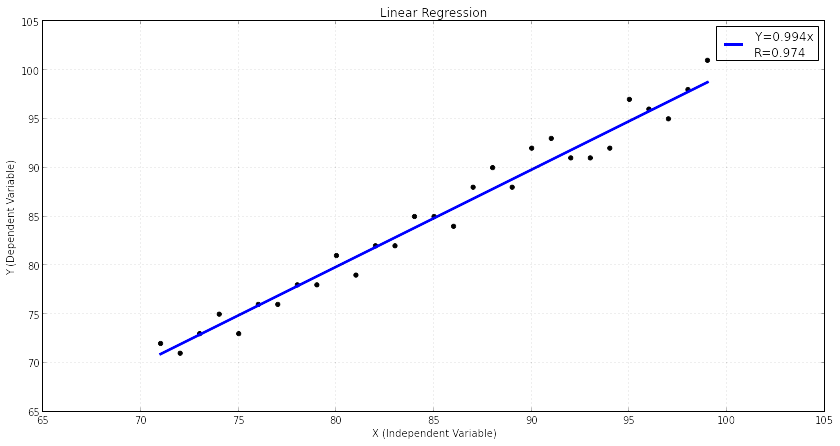

In [22]:
import matplotlib.pyplot as plt#libreria para graficar
import numpy as np#libreria algebra lineal
from sklearn import linear_model#Librería para modelo de regresión lineal

# Crear objeto de regresion lineal
regr = linear_model.LinearRegression()
# Ajustar el modelo de regresion lineal con el conjunto de entrenamiento (X,Y)
regr.fit(X_train, Y_train)
#coeficiente de regresion
print 'Coefficients: \n', regr.coef_
#Medicion de el Coeficiente de determinación
r_score='Y='+str(round(regr.coef_[0],3))+'x  \nR='+str(round(regr.score(np.array(X_test),Y_test),3))


#Puntaje de varianza explicada 1 es predición perfecta
print('Variance score: %.2f' % regr.score(X_test, Y_test))
# graficar regresion
fig = plt.figure(figsize=(14, 7), dpi=100)#Dimension de la figura  
#grafica de conjunto de testing (X,Y) color negro
plt.scatter(np.array(X_test), Y_test,  color='black')
#grafica de conjunto de testing X, con la prediccion de y color negro


plt.plot(np.array(X_test), regr.predict(np.array(X_test)), color='blue',linewidth=3)#grafica el conjunto de testing
plt.xlabel("X (Independent Variable)")#etiqeuta eje x
plt.ylabel("Y (Dependent Variable)")#etiqeuta eje y
plt.title("Linear Regression")#titulo gráfica
plt.legend([r_score])#dibuja el puntaje R
plt.grid()#Dibuja la grilla
plt.show()#muestra la grafica

###Classification and Regression Trees (C&RT)

C&RT, a recursive partitioning method, builds classification and regression trees for predicting continuous dependent variables (regression) and categorical predictor variables (classification). A general introduction to tree-classifiers, specifically to the QUEST (Quick, Unbiased, Efficient Statistical Trees) algorithm, is also presented in the context of the Classification Trees Analysis facilities, and much of the following discussion presents the same information, in only a slightly different context. Another, similar type of tree building algorithm is CHAID (Chi-square Automatic Interaction Detector; see Kass, 1980).


The classification and Regression Trees are powerfull statistical tool for making decision, these tools are used in predictions (regression type problem) and category to which a variable belongs (classification type problem).

####Regression-type problem

Regression-type problems are generally those where we attempt to predict the values of a continuous variable from one or more continuous and/or categorical predictor variables. For example, we may want to predict the selling prices of single family homes (a continuous dependent variable) from various other continuous predictors (e.g., square footage) as well as categorical predictors (e.g., style of home, such as ranch, two-story, etc.; zip code or telephone area code where the property is located, etc.;

####Classification-type problem

Classification-type problems are generally those where we attempt to predict values of a categorical dependent variable (class, group membership, etc.) from one or more continuous and/or categorical predictor variables. For example, we may be interested in predicting who will or will not graduate from college, or who will or will not renew a subscription. These would be examples of simple binary classification problems, where the categorical dependent variable can only assume two distinct and mutually exclusive values. In other cases, we might be interested in predicting which one of multiple different alternative consumer products (e.g., makes of cars) a person decides to purchase, or which type of failure occurs with different types of engines.


####Mathematical Context behind Decision Tree Regression

(C&RT)is composed by nodes, Each node is associated a particular set of records $T$ that is spplited in specific feature.For example, a split on a continuous attribute $A$ can be induced by the test $A \leq x$. The set of records $T$ is then partitioned in two subsets that leads to the left branch of the tree and the right one.

$T_l=\{t \in T: t(A) \leq x\}$

and

$T_r=\{t \in T: t(A) \geq x\}$

Similarly, a categorical feature $B$ can be used to induce splits according to its values. For example, if $B={b1,…,bk}$ each branch $i$ can be induced by the test $B=b_i$.The divide step of the recursive algorithm to induce decision tree takes into account all possible splits for each feature and tries to find the best one according to a chosen quality measure: the splitting criterion. If your dataset is induced on the following scheme

\begin{align}
    A_1,A_2,...,A_m,C 
\end{align}

where $A_i$ are attributes for regression and $C$ is target prediction, C&RT uses the <a href="http://en.wikipedia.org/wiki/Gini_coefficient">Gini Coefficient</a> as measure set $E$ of class or interval  $c_j$ 


\begin{align}
    p_j=\frac{|\{t \in E: min(c_j) \leq t(C) \leq max(c_j)\}|}{|E|}
\end{align}

and Gini Coefficient is given by

\begin{align}
    Gini(E)=1-\sum_{j=1}^{Q} p_j^2
\end{align}

where $Q$ is classes for classification and intervals for regression.

For more information about this issue review <a href="http://statweb.stanford.edu/~tibs/ElemStatLearn/">The Elements of Statistical Learning </a> Chapter 9, section 9.2 Decision Trees (9.2.2) and Classification Trees (9.2.3).


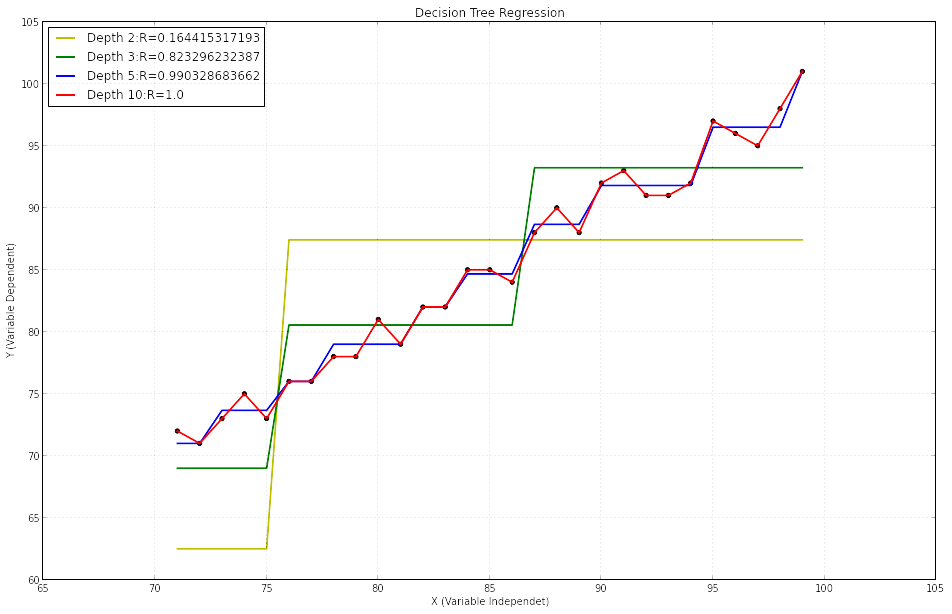

In [26]:
# 
# Fit regression model
from sklearn.tree import DecisionTreeRegressor#Library for DecisionTreeRegressor

clf_1 = DecisionTreeRegressor(max_depth=2)#Decision Tree Regressor de nivel 2
clf_2 = DecisionTreeRegressor(max_depth=3)#Decision Tree Regressor de nivel 3
clf_3 = DecisionTreeRegressor(max_depth=5)#Decision Tree Regressor de nivel 5
clf_4 = DecisionTreeRegressor(max_depth=10)#Decision Tree Regressor de nivel 10


result1=clf_1.fit(X,Y)#Ajuste de modelo con árboles de decision nivel 2
result2=clf_2.fit(X,Y)#Ajuste de modelo con árboles de decision nivel 3
result3=clf_3.fit(X,Y)#Ajuste de modelo con árboles de decision nivel 5
result4=clf_4.fit(X,Y)#Ajuste de modelo con árboles de decision nivel 10


# Predicción y cálculo del coeficiente de determinación para cada uno de los modelos
y_1 = clf_1.predict(X_test)
r1_score='R='+str(clf_1.score(np.array(X_test),Y_test))
y_2 = clf_2.predict(X_test)
r2_score='R='+str(clf_2.score(np.array(X_test),Y_test))
y_3 = clf_3.predict(X_test)
r3_score='R='+str(clf_3.score(np.array(X_test),Y_test))
y_4 = clf_4.predict(X_test)
r4_score='R='+str(clf_4.score(np.array(X_test),Y_test))
# Gráfica de resultados
fig = plt.figure(figsize=(16, 10), dpi=100)#Dimension de la figura  
#plt.scatter(X, Y, c="k", label="data")
plt.scatter(np.array(X_test), Y_test, c="k", label="data")
plt.plot(X_test, y_1, c="y", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="g", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, c="b", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_4, c="r", label="max_depth=10", linewidth=2)
plt.xlabel("X (Variable Independet)")
plt.ylabel("Y (Variable Dependent)")
plt.title("Decision Tree Regression")
plt.legend(["Depth 2:"+r1_score,"Depth 3:"+r2_score,"Depth 5:"+r3_score,"Depth 10:"+r4_score],loc=2)
plt.grid()#Dibuja la grilla
plt.show()